<a href="https://colab.research.google.com/github/mhdykz/Implementation-of-artificial-intelligence-with-Tensorflow/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import h5py

In [75]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0], 1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0], 1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [76]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig = load_data()

In [77]:
x_train = train_set_x_orig.astype("float32") / 255
x_test = test_set_x_orig.astype("float32") / 255
y_train = train_set_y_orig
y_test = test_set_y_orig

In [78]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Input , Flatten , Dropout , LeakyReLU

In [79]:
'''model = Sequential([Input(shape = (64 , 64 , 3))] , Flatten())
model.add(Dense(64*64 , activation='relu'))
'''
'''
model.add(Dense(64*64))
model.add(LeakyReLU(alpha=0.1))
'''
#model.add(Dense(64*64 , activation='swish'))






'\nmodel.add(Dense(64*64))\nmodel.add(LeakyReLU(alpha=0.1))\n'

In [80]:
model = Sequential([
    Input(shape=(64, 64, 3)),
    Flatten(),
    Dense(1024),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(256),
    keras.layers.Activation('swish'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [81]:
from keras.optimizers import Adam
import matplotlib.pyplot as plt

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [83]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.5476 - loss: 0.9179 - val_accuracy: 0.3400 - val_loss: 0.8178
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.6310 - loss: 0.8707 - val_accuracy: 0.3400 - val_loss: 1.4421
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.5607 - loss: 0.9791 - val_accuracy: 0.6600 - val_loss: 0.6211
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.4712 - loss: 1.1046 - val_accuracy: 0.3400 - val_loss: 0.8672
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.5754 - loss: 0.8172 - val_accuracy: 0.3400 - val_loss: 1.3460
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.6551 - loss: 0.7685 - val_accuracy: 0.3400 - val_loss: 0.8124
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.5148 - loss: 1.0543 - val_accuracy: 0.3400 - val_loss: 0.8433
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.5992 - loss: 0.7452 - val_accuracy: 0.3400 - v

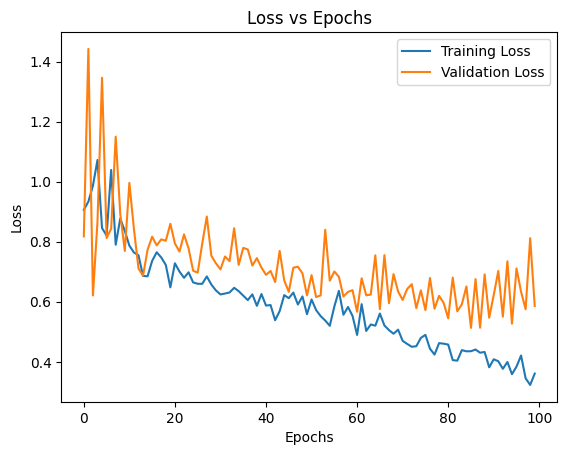

In [84]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


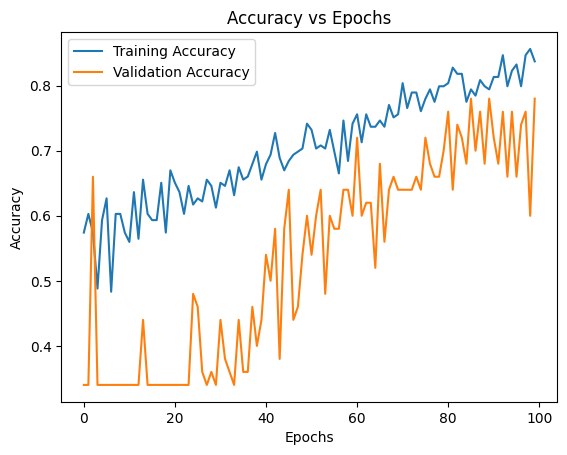

In [85]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7908 - loss: 0.5970
Test Accuracy: 78.00%
